In [156]:
using CairoMakie, NetCDF, NCDatasets;
path = "/media/Data/Jan/GridRamp1/"

nc1D_list = String[]
nc2D_list = String[]
wdir = walkdir(path)
for (root, dirs, files) in wdir
    for file in files
        if occursin("yelmo1D.nc", joinpath(root, file))
            push!(nc1D_list, joinpath(root, file))
        elseif occursin("yelmo2D.nc", joinpath(root, file))
            push!(nc2D_list, joinpath(root, file))
        end
    end
end

In [164]:
NCDataset(nc1D_list[1]) do ds
    H = ds["H_ice"]
    t = ds["time"]
end


7501-element Vector{Float32}:
 1949.7827
 1952.1051
 1950.9766
 1949.523
 1949.4164
 1950.659
 1949.5447
 1949.3893
 1947.9877
 1947.8906
    ⋮
 1711.8046
 1710.8826
 1711.8514
 1711.0824
 1711.1072
 1711.1857
 1712.0615
 1711.6177
 1711.119

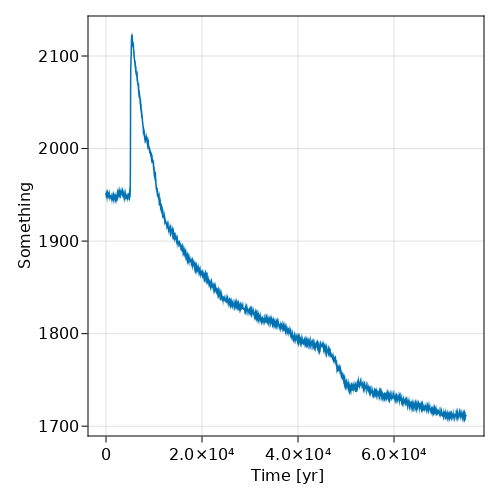

In [169]:
function init_fig(rsl)
    fig = Figure(resolution = rsl)
end

function line_on_ax(ax, t, var)
    # println(var)
    # ylbl = string(var.attrib["long_name"], " [", var.attrib["units"], "]")
    lines!(ax, t, var)
end

fig = init_fig((500, 500))
ax = Axis(fig[1,1], xlabel = "Time [yr]", ylabel = "Something")
line_on_ax(ax, t, H)
fig
